## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.15, 0.2, 0.25, 0.3, 0.35]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dp in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout = %.6f" % (dp))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dp)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-dp-%s" % str(dp)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with Dropout = 0.150000


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)             

50000/50000 [==============================] - 4s 77us/step - loss: 1.3542 - acc: 0.5140 - val_loss: 1.3704 - val_acc: 0.5119
Epoch 36/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.3591 - acc: 0.5124 - val_loss: 1.3946 - val_acc: 0.5053
Epoch 37/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.3546 - acc: 0.5110 - val_loss: 1.3828 - val_acc: 0.5035
Epoch 38/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.3468 - acc: 0.5144 - val_loss: 1.3922 - val_acc: 0.5090
Epoch 39/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.3488 - acc: 0.5142 - val_loss: 1.3782 - val_acc: 0.5099
Epoch 40/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.3376 - acc: 0.5176 - val_loss: 1.3700 - val_acc: 0.5152
Epoch 41/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.3395 - acc: 0.5178 - val_loss: 1.3914 - val_acc: 0.5052
Epoch 42/50
50000/50000 [=====================

Epoch 34/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.4566 - acc: 0.4783 - val_loss: 1.4268 - val_acc: 0.4947
Epoch 35/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.4563 - acc: 0.4766 - val_loss: 1.4475 - val_acc: 0.4825
Epoch 36/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.4547 - acc: 0.4772 - val_loss: 1.4271 - val_acc: 0.4941
Epoch 37/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.4456 - acc: 0.4814 - val_loss: 1.4505 - val_acc: 0.4815
Epoch 38/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.4593 - acc: 0.4783 - val_loss: 1.4290 - val_acc: 0.4913
Epoch 39/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.4433 - acc: 0.4819 - val_loss: 1.4072 - val_acc: 0.4966
Epoch 40/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.4377 - acc: 0.4816 - val_loss: 1.4177 - val_acc: 0.4884
Epoch 41/50
50000/50000 [=========

Epoch 33/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.5270 - acc: 0.4508 - val_loss: 1.4603 - val_acc: 0.4825
Epoch 34/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.5282 - acc: 0.4513 - val_loss: 1.4680 - val_acc: 0.4809
Epoch 35/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.5228 - acc: 0.4492 - val_loss: 1.4576 - val_acc: 0.4853
Epoch 36/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.5124 - acc: 0.4547 - val_loss: 1.4537 - val_acc: 0.4821
Epoch 37/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.5087 - acc: 0.4583 - val_loss: 1.4731 - val_acc: 0.4830
Epoch 38/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.5037 - acc: 0.4593 - val_loss: 1.4607 - val_acc: 0.4758
Epoch 39/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.5044 - acc: 0.4606 - val_loss: 1.4512 - val_acc: 0.4869
Epoch 40/50
50000/50000 [=========

Epoch 32/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5882 - acc: 0.4273 - val_loss: 1.5218 - val_acc: 0.4635
Epoch 33/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5824 - acc: 0.4293 - val_loss: 1.5156 - val_acc: 0.4660
Epoch 34/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.5852 - acc: 0.4259 - val_loss: 1.5328 - val_acc: 0.4580
Epoch 35/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.5778 - acc: 0.4282 - val_loss: 1.5283 - val_acc: 0.4694
Epoch 36/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5680 - acc: 0.4322 - val_loss: 1.5041 - val_acc: 0.4720
Epoch 37/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5702 - acc: 0.4320 - val_loss: 1.5024 - val_acc: 0.4795
Epoch 38/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5686 - acc: 0.4332 - val_loss: 1.5213 - val_acc: 0.4635
Epoch 39/50
50000/50000 [=========

Epoch 31/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.7348 - acc: 0.3692 - val_loss: 1.6657 - val_acc: 0.4135
Epoch 32/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.7297 - acc: 0.3718 - val_loss: 1.6461 - val_acc: 0.4204
Epoch 33/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.7135 - acc: 0.3792 - val_loss: 1.6573 - val_acc: 0.4258
Epoch 34/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.7108 - acc: 0.3813 - val_loss: 1.6694 - val_acc: 0.4181
Epoch 35/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.7151 - acc: 0.3779 - val_loss: 1.6674 - val_acc: 0.4191
Epoch 36/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.7075 - acc: 0.3825 - val_loss: 1.6376 - val_acc: 0.4231
Epoch 37/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.7099 - acc: 0.3813 - val_loss: 1.6570 - val_acc: 0.4181
Epoch 38/50
50000/50000 [=========

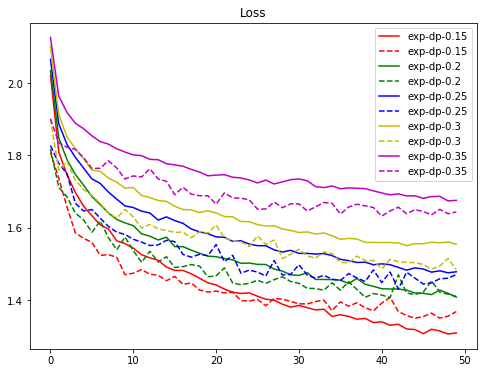

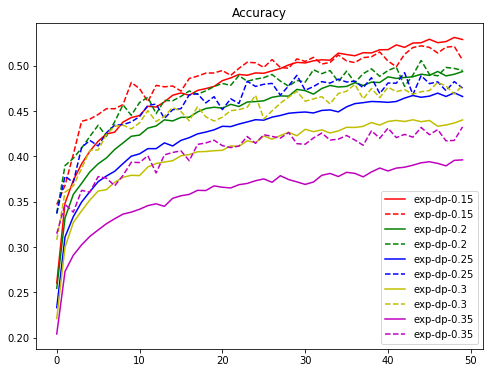

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Accuracy")
plt.show()